# Final Model On Resale Car Price Prediction

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

from sklearn.linear_model import Ridge ,Lasso

rid = Ridge()

las = Lasso()

pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

# Overview of Data_set

In [2]:
car = pd.read_csv(r"D:\Python data sets\Resale_car_Price.csv")

In [3]:
print(car.shape)
car.head(3)

(70375, 9)


,Manufactured_Company,Year,Price_in_USD,Transmission,Total_Distance_Travel_in_KM\t,Fuel_Type,Tax_in_USD,MPG,Engine_Size_In_Tonnes
0,Audi,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Audi,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,2016,11000,Manual,29946,Petrol,30,55.4,1.4


In [4]:
car.columns

Index(['Manufactured_Company', 'Year', 'Price_in_USD', 'Transmission',
       'Total_Distance_Travel_in_KM\t', 'Fuel_Type', 'Tax_in_USD', 'MPG',
       'Engine_Size_In_Tonnes'],
      dtype='object')

In [5]:
car.select_dtypes(include = 'object').columns

Index(['Manufactured_Company', 'Transmission', 'Fuel_Type'], dtype='object')

# Exploratory Data Ananlysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


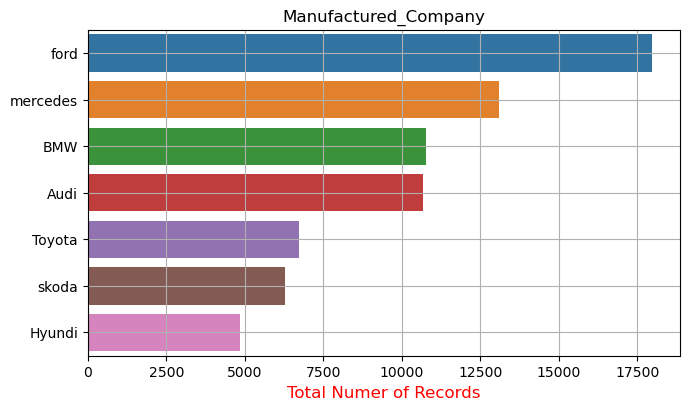

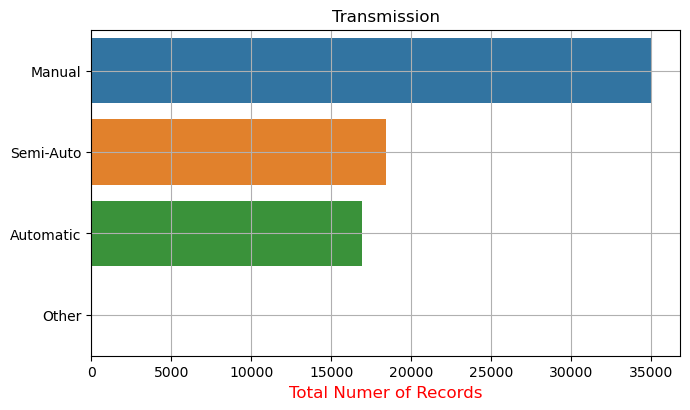

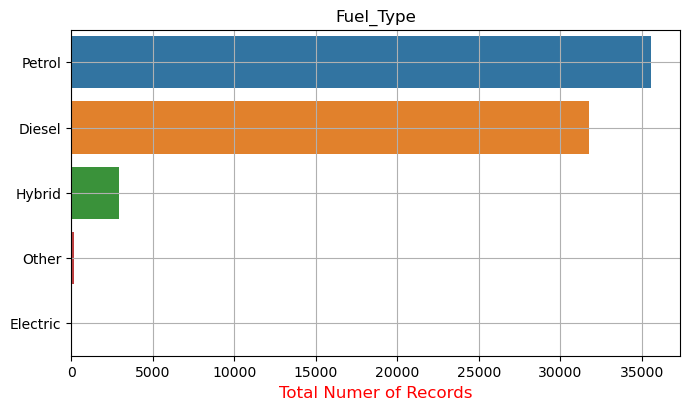

In [6]:
categorcial_features = ['Manufactured_Company' , 'Transmission' , 'Fuel_Type']
for col in categorcial_features:
    plt.figure(figsize=(7,4))
    sns.barplot(car[col].value_counts().values, car[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()
    plt.grid()
    plt.xlabel( 'Total Numer of Records', size = 12,  color = 'red')


# The above plot gives the information about Count of different category of the Categorical Variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of the cars According to Year')

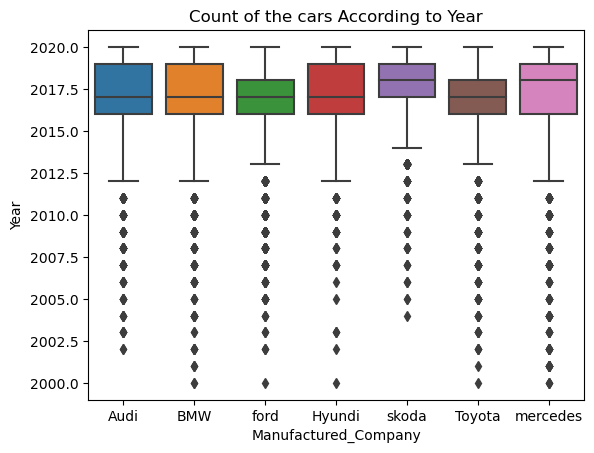

In [7]:
sns.boxplot(car.Manufactured_Company , car.Year)
plt.title("Count of the cars According to Year")

<AxesSubplot:>

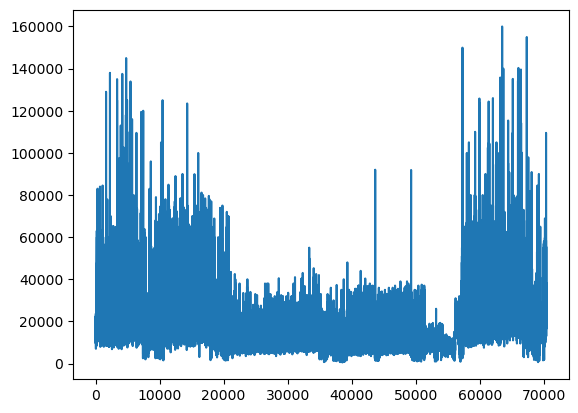

In [8]:
car.Price_in_USD.plot()

In [9]:
# plt.figure(figsize = (10,10))
# sns.catplot(x ='model' ,y ='Price_in_USD', data = car , hue = 'transmission', marker ='.')

In [10]:
# plt.figure(figsize = (10,10))
# sns.catplot(x ='model' ,y ='Price_in_USD', data = car , hue = 'fuelType', marker ='.')

In [11]:
car.describe(percentiles = [.1,.2,.3,.4,.5,.6,.7,.8,.9,])

,Year,Price_in_USD,Total_Distance_Travel_in_KM\t,Tax_in_USD,MPG,Engine_Size_In_Tonnes
count,70375.000000,70375.000000,70375.000000,70375.000000,70375.000000,70375.000000
mean,2017.081748,18040.381641,23170.153989,120.251652,56.180776,1.724193
std,2.104932,10596.817173,21329.367598,64.492532,17.418997,0.605285
min,2000.000000,495.000000,1.000000,0.000000,1.100000,0.000000
10%,2015.000000,7995.000000,2743.400000,20.000000,39.200000,1.000000
20%,2016.000000,9990.000000,5696.000000,30.000000,44.800000,1.100000
30%,2016.000000,11552.000000,9210.000000,135.000000,48.700000,1.400000
40%,2017.000000,13598.000000,13071.600000,145.000000,53.300000,1.500000
50%,2017.000000,15750.000000,17402.000000,145.000000,56.500000,1.600000
60%,2018.000000,17994.000000,22756.400000,145.000000,58.900000,2.000000


# Data Preprocessing 

In [12]:
car.Manufactured_Company.replace({'mercedes':6 , 'BMW':5 , 'Audi':4 , 'ford':3 , 'skoda':2 ,'Toyota':1 , 'Hyundi':0 } , inplace =True)

In [13]:
car.Transmission.replace({'Manual':0,'Semi-Auto':1, 'Automatic':2,'Other':2}, inplace = True)

In [14]:
car.Fuel_Type.replace({'Petrol':0 , 'Diesel':1 , 'Hybrid':2,'Other':2 , 'Electric':2},inplace = True)

In [15]:
car.select_dtypes(include = 'object').columns

Index([], dtype='object')

In [16]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70375 entries, 0 to 70374
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Manufactured_Company          70375 non-null  int64  
 1   Year                          70375 non-null  int64  
 2   Price_in_USD                  70375 non-null  int64  
 3   Transmission                  70375 non-null  int64  
 4   Total_Distance_Travel_in_KM	  70375 non-null  int64  
 5   Fuel_Type                     70375 non-null  int64  
 6   Tax_in_USD                    70375 non-null  int64  
 7   MPG                           70375 non-null  float64
 8   Engine_Size_In_Tonnes         70375 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 4.8 MB


Data Preprocessing is completed .Now we are going to Bulid the Predictive model on give data_set 

Before Buliding the Predictive model We have to do two things 'Remove all the outliers' and Feature_Selection 

# Lets Remove the outliers for given data Set

In [17]:
car.Price_in_USD.describe(percentiles = [.1,.2,.3,.4,.5,.6,.7,.8,.9,])

count     70375.000000
mean      18040.381641
std       10596.817173
min         495.000000
10%        7995.000000
20%        9990.000000
30%       11552.000000
40%       13598.000000
50%       15750.000000
60%       17994.000000
70%       20500.000000
80%       24590.000000
90%       30500.000000
max      159999.000000
Name: Price_in_USD, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price_in_USD'>

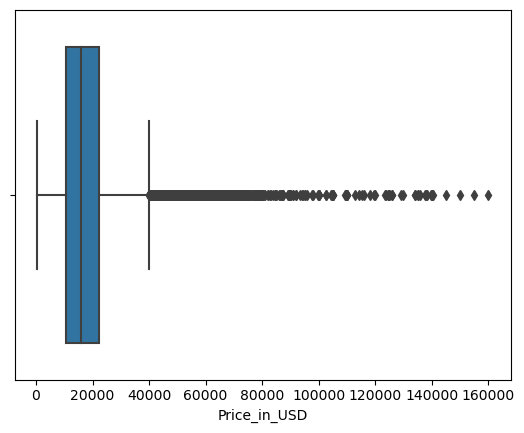

In [18]:
sns.boxplot(car.Price_in_USD)

In [19]:
def remove_outliers(df,  col, k  ):   
    mean = df[col].mean()
    global df1
    sd = df[col].std()    
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]         
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)     
    print("Number of outliers removed == >"   ,  df.shape[0]  - df1.shape[0])


In [20]:
remove_outliers(car , 'Price_in_USD' , 2)

(67514, 9)
Number of outliers removed == > 2861


In [21]:
car = df1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price_in_USD'>

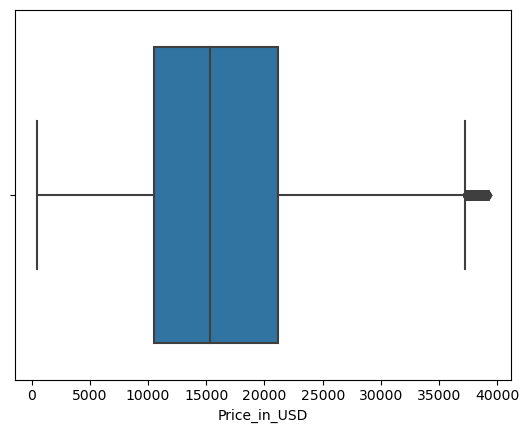

In [22]:
sns.boxplot(car.Price_in_USD)

In [23]:
# 'Price_in_USD' is our Traget columns 

# 1st we have find out some outliers in target column

<AxesSubplot:>

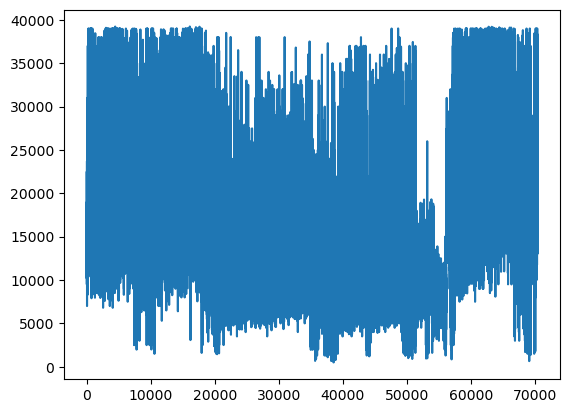

In [24]:
car.Price_in_USD.plot()

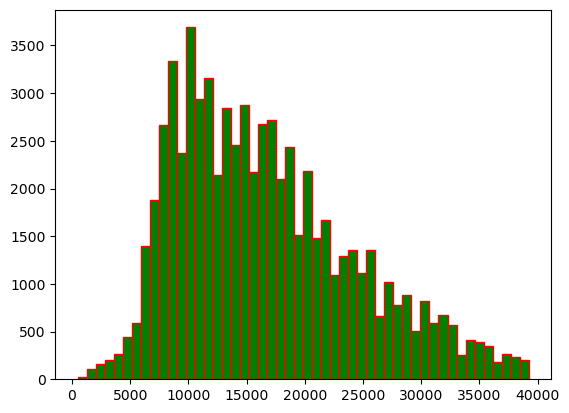

In [25]:
plt.hist(car.Price_in_USD , bins=50 , edgecolor='red' , color = 'green');

In [26]:
car.Price_in_USD.describe(percentiles = [.1,.2,.3,.4,.5,.6,.7,.8,.9,])

count    67514.000000
mean     16610.816320
std       7663.972307
min        495.000000
10%       7990.000000
20%       9795.000000
30%      11440.000000
40%      13295.400000
50%      15298.000000
60%      17483.400000
70%      19895.000000
80%      22998.000000
90%      27990.000000
max      39225.000000
Name: Price_in_USD, dtype: float64

# Feature_Selection_

In [27]:
car.corr()

,Manufactured_Company,Year,Price_in_USD,Transmission,Total_Distance_Travel_in_KM\t,Fuel_Type,Tax_in_USD,MPG,Engine_Size_In_Tonnes
Manufactured_Company,1.000000,0.008854,0.466831,0.311762,0.055940,0.151517,0.112556,-0.035378,0.441664
Year,0.008854,1.000000,0.551626,0.058803,-0.742023,-0.086180,0.185135,-0.082424,-0.125256
Price_in_USD,0.466831,0.551626,1.000000,0.475440,-0.453598,0.221744,0.359694,-0.253742,0.534348
Transmission,0.311762,0.058803,0.475440,1.000000,-0.020266,0.377787,0.168176,-0.032952,0.457419
Total_Distance_Travel_in_KM\t,0.055940,-0.742023,-0.453598,-0.020266,1.000000,0.213214,-0.198756,0.132607,0.195172
Fuel_Type,0.151517,-0.086180,0.221744,0.377787,0.213214,1.000000,-0.168291,0.388622,0.480222
Tax_in_USD,0.112556,0.185135,0.359694,0.168176,-0.198756,-0.168291,1.000000,-0.427019,0.293588
MPG,-0.035378,-0.082424,-0.253742,-0.032952,0.132607,0.388622,-0.427019,1.000000,-0.214689
Engine_Size_In_Tonnes,0.441664,-0.125256,0.534348,0.457419,0.195172,0.480222,0.293588,-0.214689,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


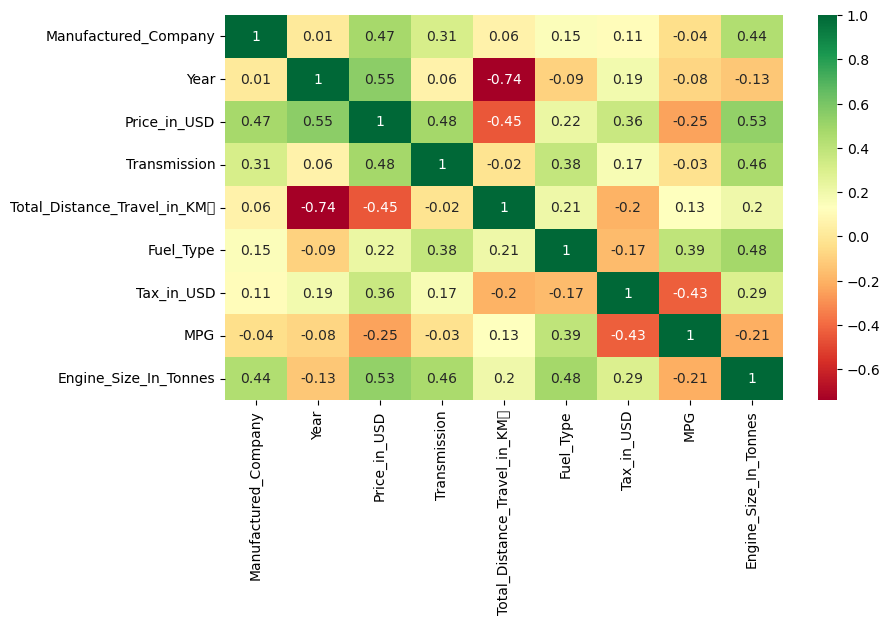

In [28]:
plt.figure(figsize = (9,5))
sns.heatmap(np.round(car.corr(),2), annot=True, cmap='RdYlGn')

In [29]:
cor_list = []

x_col = car.drop('Price_in_USD' , axis = 1).columns

In [30]:
x_col

Index(['Manufactured_Company', 'Year', 'Transmission',
       'Total_Distance_Travel_in_KM\t', 'Fuel_Type', 'Tax_in_USD', 'MPG',
       'Engine_Size_In_Tonnes'],
      dtype='object')

In [31]:
for col in x_col:
    cor_list.append(car.Price_in_USD.corr(car[col]))

In [32]:
cols_corr =pd.DataFrame()

cols_corr['Columns']= x_col

cols_corr['Correlation']=cor_list

In [33]:
df2 = cols_corr[(cols_corr.Correlation < - 0.35)|(cols_corr.Correlation >  0.35)]

In [34]:
l1 = list(df2.Columns)

l1.append('Price_in_USD')

In [35]:
car = car.loc[: , l1]

In [36]:
car.corr()

,Manufactured_Company,Year,Transmission,Total_Distance_Travel_in_KM\t,Tax_in_USD,Engine_Size_In_Tonnes,Price_in_USD
Manufactured_Company,1.000000,0.008854,0.311762,0.055940,0.112556,0.441664,0.466831
Year,0.008854,1.000000,0.058803,-0.742023,0.185135,-0.125256,0.551626
Transmission,0.311762,0.058803,1.000000,-0.020266,0.168176,0.457419,0.475440
Total_Distance_Travel_in_KM\t,0.055940,-0.742023,-0.020266,1.000000,-0.198756,0.195172,-0.453598
Tax_in_USD,0.112556,0.185135,0.168176,-0.198756,1.000000,0.293588,0.359694
Engine_Size_In_Tonnes,0.441664,-0.125256,0.457419,0.195172,0.293588,1.000000,0.534348
Price_in_USD,0.466831,0.551626,0.475440,-0.453598,0.359694,0.534348,1.000000


 Now our DataFrame has only 6 Features ['model' , 'year' , 'transmission' , 'mileage' , 'Tax_is_USD' , 'engine_Size' ]
    
We eleminate the two features " mpg " and " fuleType "  because these two feature have minimum corelation with the Price_in_USD

Then their is no point to add them into our Data_set

# Random_Sampling-

In [37]:
car_train, car_test = train_test_split(car , test_size = 0.2)

car_train_x  = car_train.drop('Price_in_USD' , axis = 1)

car_train_y  = car_train.Price_in_USD

car_test_x  = car_test.drop('Price_in_USD' , axis = 1)

car_test_y  = car_test.Price_in_USD

In [38]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67514 entries, 0 to 70373
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Manufactured_Company          67514 non-null  int64  
 1   Year                          67514 non-null  int64  
 2   Transmission                  67514 non-null  int64  
 3   Total_Distance_Travel_in_KM	  67514 non-null  int64  
 4   Tax_in_USD                    67514 non-null  int64  
 5   Engine_Size_In_Tonnes         67514 non-null  float64
 6   Price_in_USD                  67514 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [39]:
kkk

NameError: name 'kkk' is not defined

# Predictive Model_Buliding

In [40]:
Model_Name = ['LinearRegression' , 'Ridge', 'Lasso','ElasticNet' , 'ExtraTreeRegressor'
              , 'DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','SGDRegressor']
R_sq = []
MSE = []
RMSE = []
MAPE = []
Accuracy = []

# LinearRegression

In [41]:
linreg.fit(car_train_x , car_train_y)

LinearRegression()

In [42]:
r_sq = linreg.score(car_train_x , car_train_y)
r_sq

0.7707980225038653

In [43]:
N = car_train_x.shape[0]
K = car_train_x.shape[1]

Adj_R_sq = 1 - (1-r_sq)*(N-1)/(N-K-1)
Adj_R_sq

0.7707725575037732

In [44]:
pred_test = linreg.predict(car_test_x)

err_test = car_test_y - pred_test

In [45]:
mse = np.mean(np.square(err_test))

rmse = np.sqrt(mse)

mape = np.mean(np.abs(err_test*100/car_test_y))

accuracy = 100 - mape

print('MSE = ', mse)

print('RMSE = ', rmse)

print('MAPE = ', mape)

print('Accuracy = ',accuracy)

R_sq.append(r_sq)
MSE.append(mse)
RMSE.append(rmse)
MAPE.append(mape)
Accuracy.append(accuracy)

MSE =  13288934.034847077
RMSE =  3645.399022719883
MAPE =  20.989728303213532
Accuracy =  79.01027169678648


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_in_USD', ylabel='Density'>

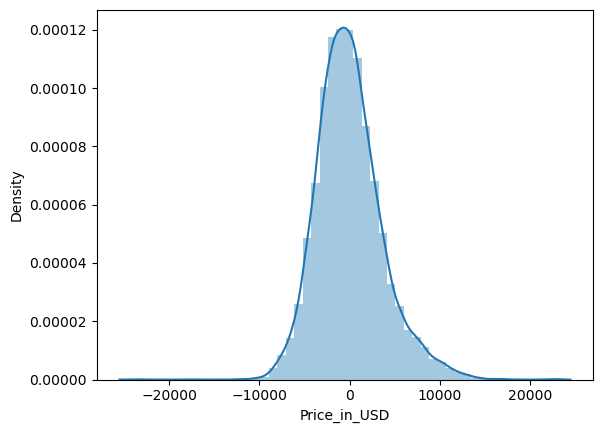

In [47]:
sns.distplot(car_test_y - pred_test)

# Ridge

In [48]:
rid.fit(car_train_x , car_train_y)

Ridge()

In [49]:
r_sq = rid.score(car_train_x , car_train_y)
r_sq

0.7707980212947595

In [50]:
pred_test = rid.predict(car_test_x)

err_test = car_test_y - pred_test

In [51]:
mse = np.mean(np.square(err_test))

rmse = np.sqrt(mse)

mape = np.mean(np.abs(err_test*100/car_test_y))

accuracy = 100 - mape

print('MSE = ', mse)

print('RMSE = ', rmse)

print('MAPE = ', mape)

print('Accuracy = ',accuracy)

R_sq.append(r_sq)
MSE.append(mse)
RMSE.append(rmse)
MAPE.append(mape)
Accuracy.append(accuracy)

MSE =  13288932.859414667
RMSE =  3645.3988614985146
MAPE =  20.989701883475593
Accuracy =  79.01029811652441


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_in_USD', ylabel='Density'>

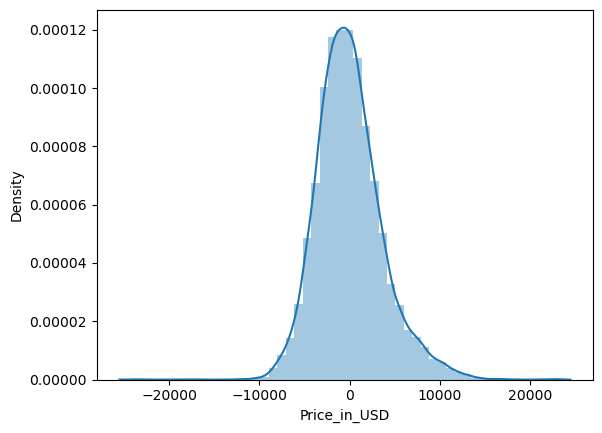

In [52]:
sns.distplot(car_test_y - pred_test)

# Lasso

In [53]:
las.fit(car_train_x ,car_train_y)

Lasso()

In [54]:
r_sq = las.score(car_train_x , car_train_y)
r_sq

0.7707979397570892

In [55]:
pred_test = las.predict(car_test_x)

err_test = car_test_y - pred_test

In [56]:
mse = np.mean(np.square(err_test))

rmse = np.sqrt(mse)

mape = np.mean(np.abs(err_test*100/car_test_y))

accuracy = 100 - mape

print('MSE = ', mse)

print('RMSE = ', rmse)

print('MAPE = ', mape)

print('Accuracy = ',accuracy)

R_sq.append(r_sq)
MSE.append(mse)
RMSE.append(rmse)
MAPE.append(mape)
Accuracy.append(accuracy)

MSE =  13288875.640103852
RMSE =  3645.3910133350378
MAPE =  20.988487127136075
Accuracy =  79.01151287286393


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_in_USD', ylabel='Density'>

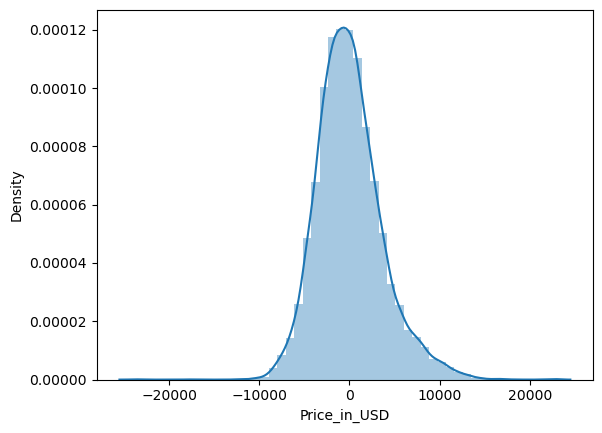

In [57]:
sns.distplot(car_test_y - pred_test)

In [58]:
from sklearn.linear_model import ElasticNet , SGDRegressor

ele_net = ElasticNet()

sgd_model = SGDRegressor()

# ElasticNet

In [59]:
ele_net.fit(car_train_x ,car_train_y)

ElasticNet()

In [60]:
r_sq = ele_net.score(car_train_x , car_train_y)

r_sq

0.6985187254091523

In [61]:
pred_test = ele_net.predict(car_test_x)

err_test = car_test_y - pred_test

In [62]:
mse = np.mean(np.square(err_test))

rmse = np.sqrt(mse)

mape = np.mean(np.abs(err_test*100/car_test_y))

accuracy = 100 - mape

print('MSE = ', mse)

print('RMSE = ', rmse)

print('MAPE = ', mape)

print('Accuracy = ',accuracy)

R_sq.append(r_sq)
MSE.append(mse)
RMSE.append(rmse)
MAPE.append(mape)
Accuracy.append(accuracy)

MSE =  17501201.63092871
RMSE =  4183.443752571404
MAPE =  23.17988009175691
Accuracy =  76.82011990824309


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_in_USD', ylabel='Density'>

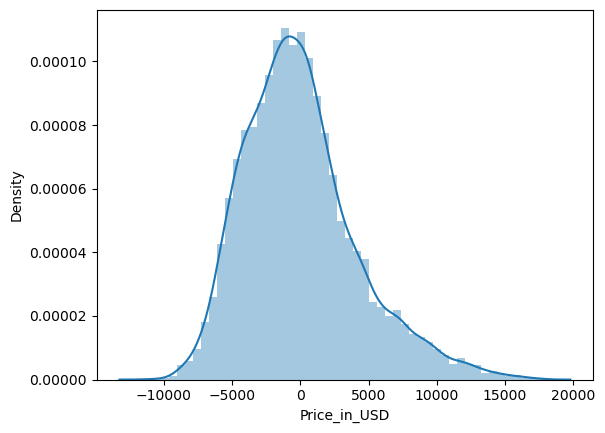

In [63]:
sns.distplot(car_test_y - pred_test)

# ExtraTreeRegressor


In [64]:
from sklearn.tree import ExtraTreeRegressor,DecisionTreeRegressor

model = ExtraTreeRegressor()
dt_reg = DecisionTreeRegressor()

In [65]:
model.fit(car_train_x , car_train_y)

ExtraTreeRegressor()

In [66]:
r_sq = model.score(car_train_x , car_train_y)

r_sq

0.9925134100649146

In [67]:
N = car_train_x.shape[0]
K = car_train_x.shape[1]

Adj_R_sq = 1 - (1-r_sq)*(N-1)/(N-K-1)
Adj_R_sq

0.9925125782832019

In [68]:
pred_test = model.predict(car_test_x)

err_test = car_test_y - pred_test

In [69]:
mse = np.mean(np.square(err_test))

rmse = np.sqrt(mse)

mape = np.mean(np.abs(err_test*100/car_test_y))

accuracy = 100 - mape

print('MSE = ', mse)

print('RMSE = ', rmse)

print('MAPE = ', mape)

print('Accuracy = ',accuracy)

R_sq.append(r_sq)
MSE.append(mse)
RMSE.append(rmse)
MAPE.append(mape)
Accuracy.append(accuracy)

MSE =  10401136.406111458
RMSE =  3225.0792867945834
MAPE =  13.377993927802345
Accuracy =  86.62200607219765


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_in_USD', ylabel='Density'>

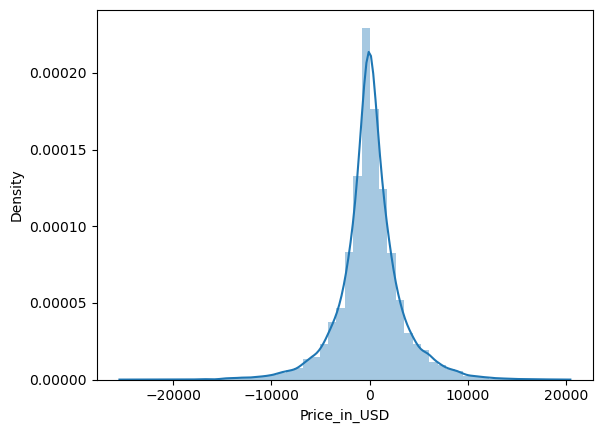

In [70]:
sns.distplot(car_test_y - pred_test)

# Decision_Tree_Regressor

In [71]:
dt_reg.fit(car_train_x ,car_train_y)

DecisionTreeRegressor()

In [72]:
r_sq = dt_reg.score(car_train_x , car_train_y)

r_sq

0.9925141975644842

In [73]:
N = car_train_x.shape[0]
K = car_train_x.shape[1]

Adj_R_sq = 1 - (1-r_sq)*(N-1)/(N-K-1)
Adj_R_sq

0.9925133658702651

In [74]:
pred_test = dt_reg.predict(car_test_x)

err_test = car_test_y - pred_test

In [75]:
mse = np.mean(np.square(err_test))

rmse = np.sqrt(mse)

mape = np.mean(np.abs(err_test*100/car_test_y))

accuracy = 100 - mape

print('MSE = ', mse)

print('RMSE = ', rmse)

print('MAPE = ', mape)

print('Accuracy = ',accuracy)

R_sq.append(r_sq)
MSE.append(mse)
RMSE.append(rmse)
MAPE.append(mape)
Accuracy.append(accuracy)

MSE =  10555799.087607155
RMSE =  3248.9689268454313
MAPE =  13.488029269644814
Accuracy =  86.51197073035519


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_in_USD', ylabel='Density'>

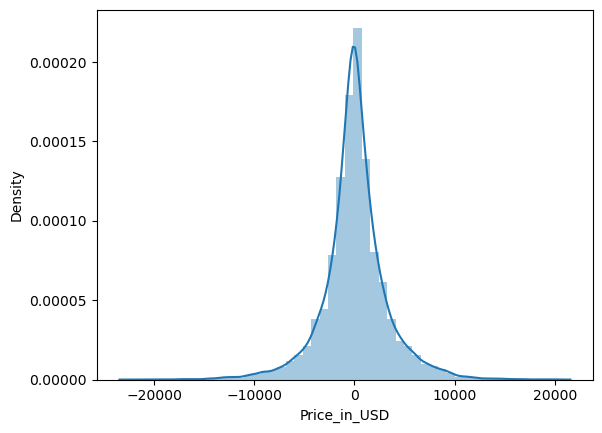

In [76]:
sns.distplot(car_test_y - pred_test)

# RandomForestRegressor

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [82]:
rf_reg.fit(car_train_x , car_train_y)

RandomForestRegressor()

In [83]:
r_sq = rf_reg.score(car_train_x , car_train_y)
r_sq

0.9763505604073746

In [84]:
pred_test =rf_reg.predict(car_test_x)

err_test = car_test_y - pred_test

In [85]:
mse = np.mean(np.square(err_test))

rmse = np.sqrt(mse)

mape = np.mean(np.abs(err_test*100/car_test_y))

accuracy = 100 - mape

print('MSE = ', mse)

print('RMSE = ', rmse)

print('MAPE = ', mape)

print('Accuracy = ',accuracy)

R_sq.append(r_sq)
MSE.append(mse)
RMSE.append(rmse)
MAPE.append(mape)
Accuracy.append(accuracy)

MSE =  7035621.014660735
RMSE =  2652.47450782486
MAPE =  11.20169304679275
Accuracy =  88.79830695320724


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_in_USD', ylabel='Density'>

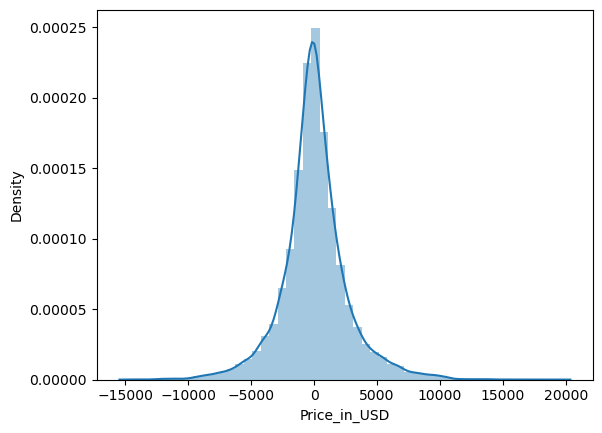

In [86]:
sns.distplot(car_test_y - pred_test)

# GradientBoostingRegressor

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

grd_model = GradientBoostingRegressor()

In [88]:
grd_model.fit(car_train_x , car_train_y)

GradientBoostingRegressor()

In [89]:
r_sq = grd_model.score(car_train_x , car_train_y)
r_sq

0.8724558177212635

In [90]:
pred_test = grd_model.predict(car_test_x)

err_test = car_test_y - pred_test

In [91]:
mse = np.mean(np.square(err_test))

rmse = np.sqrt(mse)

mape = np.mean(np.abs(err_test*100/car_test_y))

accuracy = 100 - mape

print('MSE = ', mse)

print('RMSE = ', rmse)

print('MAPE = ', mape)

print('Accuracy = ',accuracy)

R_sq.append(r_sq)
MSE.append(mse)
RMSE.append(rmse)
MAPE.append(mape)
Accuracy.append(accuracy)

MSE =  7381380.654740298
RMSE =  2716.8696425740227
MAPE =  12.729191391172288
Accuracy =  87.2708086088277


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_in_USD', ylabel='Density'>

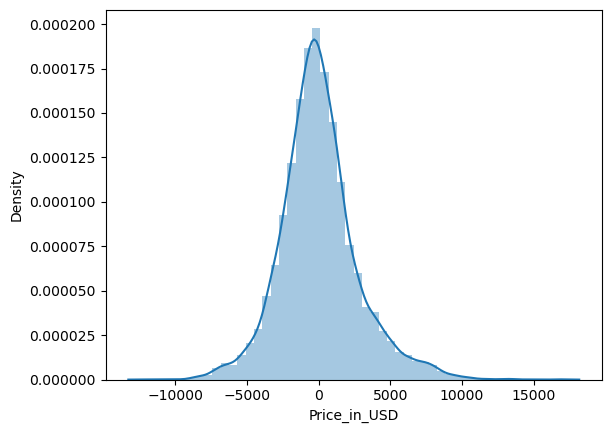

In [92]:
sns.distplot(car_test_y - pred_test)

# SGDRegressor

In [93]:
from sklearn import preprocessing



In [94]:
car_train_x1 = preprocessing.scale(car_train_x)

car_test_x1 = preprocessing.scale(car_test_x)

In [95]:
sgd_model.fit(car_train_x1,car_train_y)

SGDRegressor()

In [96]:
r_sq = sgd_model.score(car_train_x1,car_train_y)

r_sq

0.7705305237355866

In [97]:
pred_test = sgd_model.predict(car_test_x1)

err_test = car_test_y - pred_test

In [98]:
mse = np.mean(np.square(err_test))

rmse = np.sqrt(mse)

mape = np.mean(np.abs(err_test*100/car_test_y))

accuracy = 100 - mape

print('MSE = ', mse)

print('RMSE = ', rmse)

print('MAPE = ', mape)

print('Accuracy = ',accuracy)

R_sq.append(r_sq)
MSE.append(mse)
RMSE.append(rmse)
MAPE.append(mape)
Accuracy.append(accuracy)

MSE =  13312287.145471651
RMSE =  3648.6007106110765
MAPE =  21.196851130445584
Accuracy =  78.80314886955442


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_in_USD', ylabel='Density'>

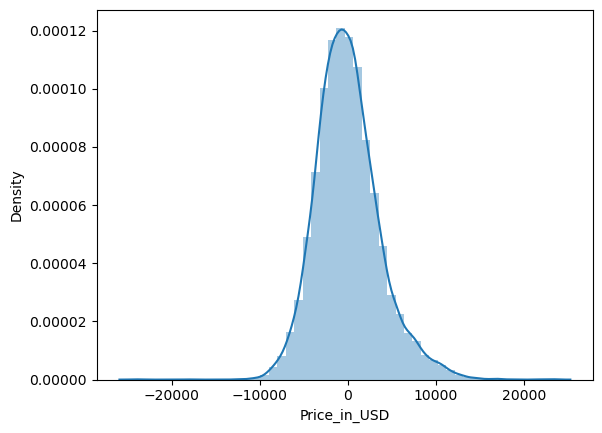

In [99]:
sns.distplot(car_test_y - pred_test)

# The above Graph shows that the error terms are normaly distributed or not

In [100]:
Comparision = pd.DataFrame()

In [101]:


Comparision['Model_Name'] = Model_Name
Comparision['R_square'] = R_sq
Comparision['Mean_Square_Error'] = MSE
Comparision['Root_Mean_Square_Error'] = RMSE
Comparision['Mean_Absolute_Precentage_Error'] = MAPE
Comparision['Accuracy'] = Accuracy

In [102]:
Comparision.sort_values('Accuracy' , ascending = False)

,Model_Name,R_square,Mean_Square_Error,Root_Mean_Square_Error,Mean_Absolute_Precentage_Error,Accuracy
6,RandomForestRegressor,0.976351,7.035621e+06,2652.474508,11.201693,88.798307
7,GradientBoostingRegressor,0.872456,7.381381e+06,2716.869643,12.729191,87.270809
4,ExtraTreeRegressor,0.992513,1.040114e+07,3225.079287,13.377994,86.622006
5,DecisionTreeRegressor,0.992514,1.055580e+07,3248.968927,13.488029,86.511971
2,Lasso,0.770798,1.328888e+07,3645.391013,20.988487,79.011513
1,Ridge,0.770798,1.328893e+07,3645.398861,20.989702,79.010298
0,LinearRegression,0.770798,1.328893e+07,3645.399023,20.989728,79.010272
8,SGDRegressor,0.770531,1.331229e+07,3648.600711,21.196851,78.803149
3,ElasticNet,0.698519,1.750120e+07,4183.443753,23.179880,76.820120


 In above DataFrame Camparision we can clearly obeserve that The algorithm 'GradientBoostingRegressor' have the high accuray 

# Now lets Verify the Assumption on GradientBoostingRegressor

In [103]:
# 1. Their is linear Relationship among Indepent variables and Depent variables.

# 2. Error terms are Normally distributed and there is no patteren among them.

# 3. Their is minimum multicolinearity among Indepent_variables.

# 4. Varience around the Regression line is same for all predicted value

In [104]:
pred_train =  grd_model.predict(car_train_x)

In [105]:
err_train = car_train_y - pred_train

In [106]:
np.mean(err_train)

6.530862697147109e-13

Mean of the error term is close to zero 

which Indicates that our assumption "Error terms are Normally distributed and there is no patteren among them." Is hold True
 

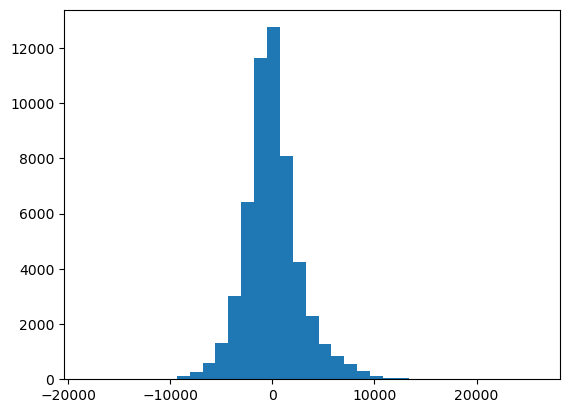

In [107]:
plt.hist(err_train, bins = 35);

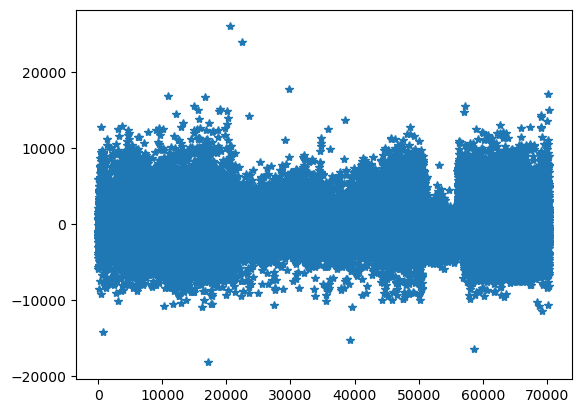

In [108]:
plt.plot(err_train , '*')

In [109]:
pred_actual = pd.DataFrame()

In [110]:
pred_actual['Actual'] = car_train_y

pred_actual['Predicted'] = pred_train

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

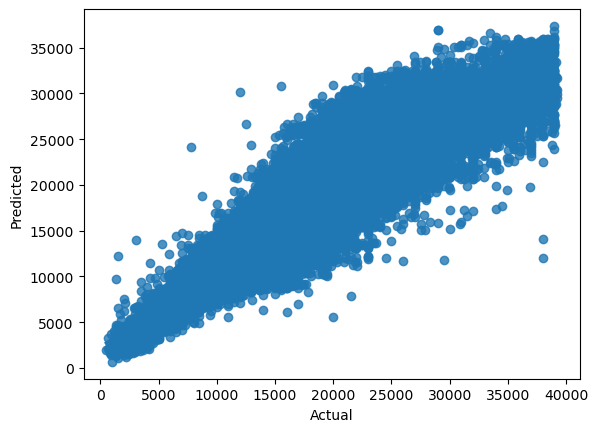

In [111]:
sns.regplot(x = 'Actual' , y = 'Predicted', data= pred_actual)

In [112]:
# We know that Assumption can not be 100 % , because Data is random in nature

check the Muliticolinearity between Independent Variables

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
vif = pd.DataFrame()

In [115]:
vif['Vif_Values'] = [variance_inflation_factor(car_train_x.values , i)  for i in range(car_train_x.shape[1])]

vif['variables'] = car_train_x.columns

In [116]:
car.columns

Index(['Manufactured_Company', 'Year', 'Transmission',
       'Total_Distance_Travel_in_KM\t', 'Tax_in_USD', 'Engine_Size_In_Tonnes',
       'Price_in_USD'],
      dtype='object')

In [117]:
vif

,Vif_Values,variables
0,5.954308,Manufactured_Company
1,13.107101,Year
2,2.307850,Transmission
3,2.544062,Total_Distance_Travel_in_KM\t
4,5.186603,Tax_in_USD
5,17.940971,Engine_Size_In_Tonnes


In [118]:
# Vif Score is near to 10 for some variable we can still ignore the Multicolinearity

# Final_Conclusion

Initially we select Data_set ' Resale Car Price ' which gives information about used car 

In the Data_set we have Several Features such as 'model', 'year', 'transmission', 'Total_Distance_Travel_in_KM',

'Tax_in_USD', 'FuleType' , 'engineSize', 'Price_in_USD''

Features of the Data_Set give the imformation about car with respect to the feature

# Main_Aim = ' Our aim is we have to predict the Price of the used car

#                       By Using Supervise_Machine learning Algorithm(model)'

Before Buliding Predict Model we do some Exploaratory Data Analysis  

Exploaratory Data Analysis is very essential to under the features of the Data_set

 In EDA we use Matplotlib and seaborn liberies to understand the features

# Before Buliding Predictive model we completed the process of Data_Preprocessing

# And After Data_Preprocessing we remove the outliers form Data_Set 

# Also we use only Significant Indepent Variables in Data_set

# we drop all Insignificat Indepent variables form Data_set

 Now we do the process of random sampling 
 
 After Random sampling we use bulid the various Regression Models on Given Data_Set
    
 for_ex ['LinearRegression' , 'Ridge', 'Lasso','ElasticNet' , 'ExtraTreeRegressor'  'DecisionTreeRegressor' , 'GradientBoostingRegressor', 'SGDRegressor']


But we get the Higher accuracy on ' GradientBoostingRegressor ' algorithm

And finally we check the all assumption on 'GradientBoostingRegressor' algorithm